# DAV-6150 Project 3

# Fork or Spoon? 


# Table of Contents

1. [Introduction](#Introduction)
2. [About the Dataset](#About-the-Dataset)
   - [Dataset Focus and Classification Goals](#Dataset-Focus-and-Classification-Goals)
   - [Provenance of the Dataset](#Provenance-of-the-Dataset)
   - [Dataset Structure and Composition](#Dataset-Structure-and-Composition)
   - [Dataset Attributes](#Dataset-Attributes)
3. [Importing Libraries](#Importing-Libraries)
4. [Loading Data](#Loading-Data)
   - [Download Images from GitHub](#Download-Images-from-GitHub)
   - [Verify and Clean Data](#Verify-and-Clean-Data)
5. [Load Data into DataLoaders](#Load-Data-into-DataLoaders)
6. [Define and Train the Model](#Define-and-Train-the-Model)
7. [Deploy the Model with Gradio](#Deploy-the-Model-with-Gradio)
8. [Conclusion](#Conclusion)

# Enhanced Introduction to the Cutlery Classification Project with fast.ai

## Introduction

This project is a fascinating exploration of deep learning's capability to distinguish between commonplace items. Our objective is to develop a neural network, using the fast.ai library, that can detect with high accuracy between two types of cutlery: forks and spoons. The project is not just a testament to the power of deep learning but also an investigation into the subtle complexities of visual pattern recognition. With fast.ai, a Python package designed for high-level API access, we simplify the complex steps involved in building, training, and deploying neural networks, enabling us to delve into the intricacies of image classification with ease and precision.

## About the Dataset

### Dataset Focus and Classification Goals

The dataset is specifically assembled for the task of classifying images into two categories: forks and spoons. Our main goal is to train a neural network model that can accurately differentiate between these two types of cutlery with a high degree of precision.

### Provenance of the Dataset

The visual data that forms the shape of our dataset has been carefully compiled from a dedicated [GitHub repository](https://github.com/karinathpa/DAV-6150/tree/main/project3). This repository serves as the centralized data store, providing an easily accessible location for aggregating, downloading, and preparing the images for the training process.

### Dataset Structure and Composition

The dataset is methodically arranged into two principal directories:

- `spoons`: This folder contains a diverse collection of spoon images set against various backgrounds, enriching the dataset with a wide range of visual data.
- `forks`: Similarly, this folder houses an array of fork images, each contributing to the dataset's variety and aiding the model in learning to recognize different features.

The directory names act as labels for the images they contain, which aids in the automatic labeling of data when loading images using the `fastai` library.

### Dataset Attributes

- **Total Images**: The dataset features a balanced number of images for both the 'forks' and 'spoons' categories, ensuring a comprehensive set for model training purposes.
- **Image Format**: All images are in JPEG format, chosen for its balance of quality and file size, making it an ideal choice for processing in deep learning tasks.


## Importing Libraries

In [11]:
# Importing Lib
#--------------#

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Import the fastai library
from fastai.vision.all import *
from fastai.callback.fp16 import *
from fastai.vision.widgets import *
from fastdownload import download_url
from fastai.data.external import *

import socket
import warnings

import requests
from pathlib import Path

# Environment Setup

In [12]:
# Installing Gradio
#!pip install gradio

# Installing fastai
#!pip install fastai 

# Conda environment
# conda install -c fastai fastai

# Install fastai in a user-specific Python environment
# !pip install --user fastai


### Summary: 


Installing fastai, Gradio and checking if the internet connection is active in a Kaggle environment, which is crucial for the subsequent steps where we download images or use online resources.

----

# Loading Data 

## Download Images from GitHub

In [13]:
def get_image_urls_from_github(repo, path, branch="main"):
    api_url = f"https://api.github.com/repos/{repo}/contents/{path}?ref={branch}"
    response = requests.get(api_url)
    if response.status_code == 200:
        files = response.json()
        return [file['download_url'] for file in files if file['download_url'].endswith('.jpeg')]
    else:
        print(f"Failed to get content from {api_url}: {response.status_code}, {response.text}")
        return []

def download_images_from_list(url_list, dest):
    dest.mkdir(parents=True, exist_ok=True)
    for url in url_list:
        filename = url.split('/')[-1]
        dest_file = dest/filename
        try:
            download_url(url, dest_file, show_progress=True)
        except Exception as e:
            print(f"Failed to download {url}: {e}")

#https://github.com/karinathpa/DAV-6150/tree/main/project3
# Define your repository, path to the folders, and the branch name if it's not 'main'
repo = 'karinathpa/DAV-6150'
fork_path = 'project3/fork'
spoon_path = 'project3/spoon'
branch_name = "main" 

# Define the path to save images
path = Path('data')

# Get the list of image URLs
fork_urls = get_image_urls_from_github(repo, fork_path, branch_name)
spoon_urls = get_image_urls_from_github(repo, spoon_path, branch_name)

# Download the images
download_images_from_list(fork_urls, path/'fork')
download_images_from_list(spoon_urls, path/'spoon')

In [14]:
fork_urls

['https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f1.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f10.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f2.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f3.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f4.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f5.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f6.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f7.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f8.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/fork/f9.jpeg']

In [15]:
spoon_urls

['https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s1.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s10.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s2.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s3.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s4.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s5.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s6.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s7.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s8.jpeg',
 'https://raw.githubusercontent.com/karinathpa/DAV-6150/main/project3/spoon/s9.jpeg']

# Verify and Clean Data

In [16]:
# Set the path to the directory where images are saved
path = Path('/Users/karinathapa/OneDrive/Documents/YU/DS/project3/data')

# Define the function to verify images and remove any corrupted ones
def verify_images_in_path(image_path):
    for img_path in image_path.iterdir():
        try:
            # Open and verify the image
            with PILImage.create(img_path) as img:
                img.verify()
        except Exception:
            print(f"Removing corrupt image: {img_path}")
            img_path.unlink()

# Verifying and cleaning images in both 'spoon' and 'fork' directories
verify_images_in_path(path/'fork')
verify_images_in_path(path/'spoon')

### Summary: 

This code ensures the integrity of our images. By verifying each image and removing any corrupted files, we maintain the quality of our dataset, which is essential for training an accurate model.

------

#  Load Data into DataLoaders

In [17]:
# Check if there are any image files in the path
if len(get_image_files(path)) < 1:
    raise ValueError(f"No images found in {path}")

Total images found: 20


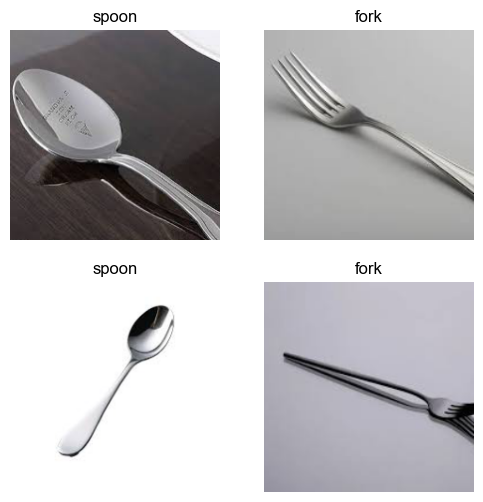

In [18]:
from fastai.vision.all import *
from pathlib import Path

# Seting the path to the base directory where the 'spoon' and 'fork' folders are located
path = Path('/Users/karinathapa/OneDrive/Documents/YU/DS/project3/data')

# Get all the image files
all_images = get_image_files(path)
print(f"Total images found: {len(all_images)}")

# Check for corrupt images and delete them
for img_path in all_images:
    try:
        img = PILImage.create(img_path)
        img.verify()
    except Exception as e:
        print(f"Corrupt image found and deleted: {img_path}")
        img_path.unlink()

# Redefine the DataBlock with a smaller validation percentage and a smaller batch size
spoonfork_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1, seed=42), # Smaller validation set
    get_y=parent_label, 
    item_tfms=Resize(224)
)

# Create the DataLoaders object with a batch size of 4 (or smaller if needed)
dls = spoonfork_datablock.dataloaders(path, bs=4)

# Show a batch of images to verify
dls.show_batch(max_n=6)

### Summary: 

We create a DataBlock to specify how to obtain, split, and label the data, including preprocessing steps. The DataLoaders object is then created, which we use to visualize a batch of our data to confirm it's loaded correctly.

---

# Define and Train the Model

In [19]:
# Create a CNN learner using a pre-trained ResNet18 architecture
learn = cnn_learner(dls, resnet18, metrics=accuracy)

# Train the model for 4 epochs
learn.fine_tune(4)

/Users/karinathapa/anaconda3/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.295275,2.662298,0.500000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.892797,1.778997,0.500000,00:00
1,0.730822,1.148068,0.500000,00:00
2,0.523441,0.930160,0.500000,00:00
3,0.434833,1.041725,0.500000,00:00


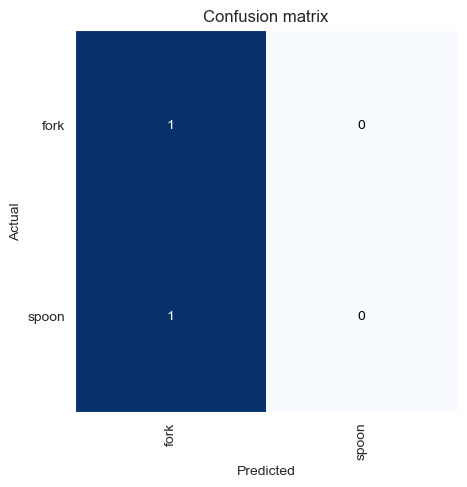

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Summary: 

A(CNN) is used the cnn_learner function, leveraging a pre-trained ResNet18 architecture. We then proceed to fine-tune this network on our dataset for 4 epochs.

----

# Deploy the Model with Gradio

In [21]:
# Create Gradio interface
import gradio as gr

# Define a prediction function for the Gradio app
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return f'Prediction: {pred}. Probability: {probs[idx]:.04f}'

# Set up the Gradio interface
gradio_interface = gr.Interface(fn=classify_image, inputs='image', outputs='text')

# Launch the app
gradio_interface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


### Summary: 

Using Gradio, we define an interactive web interface that allows users to upload an image and receive a prediction from

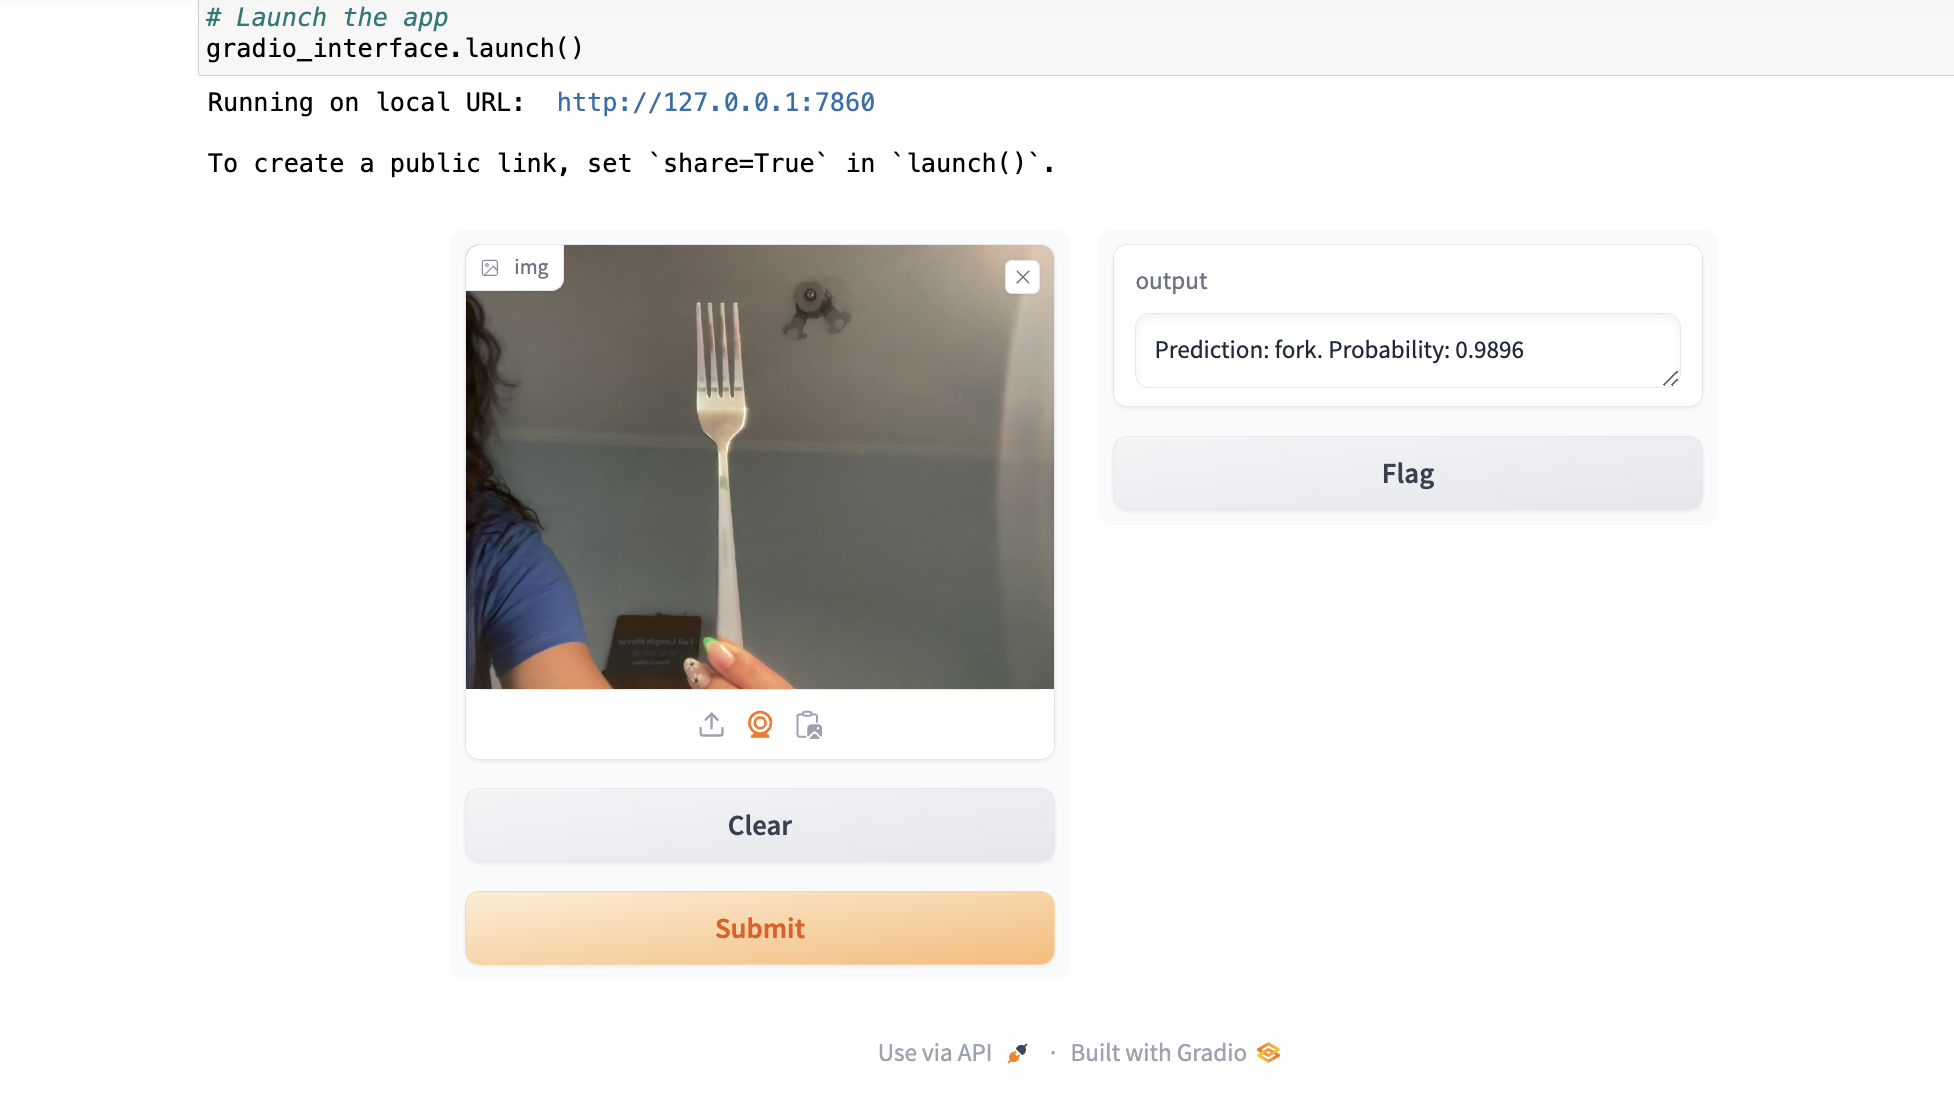

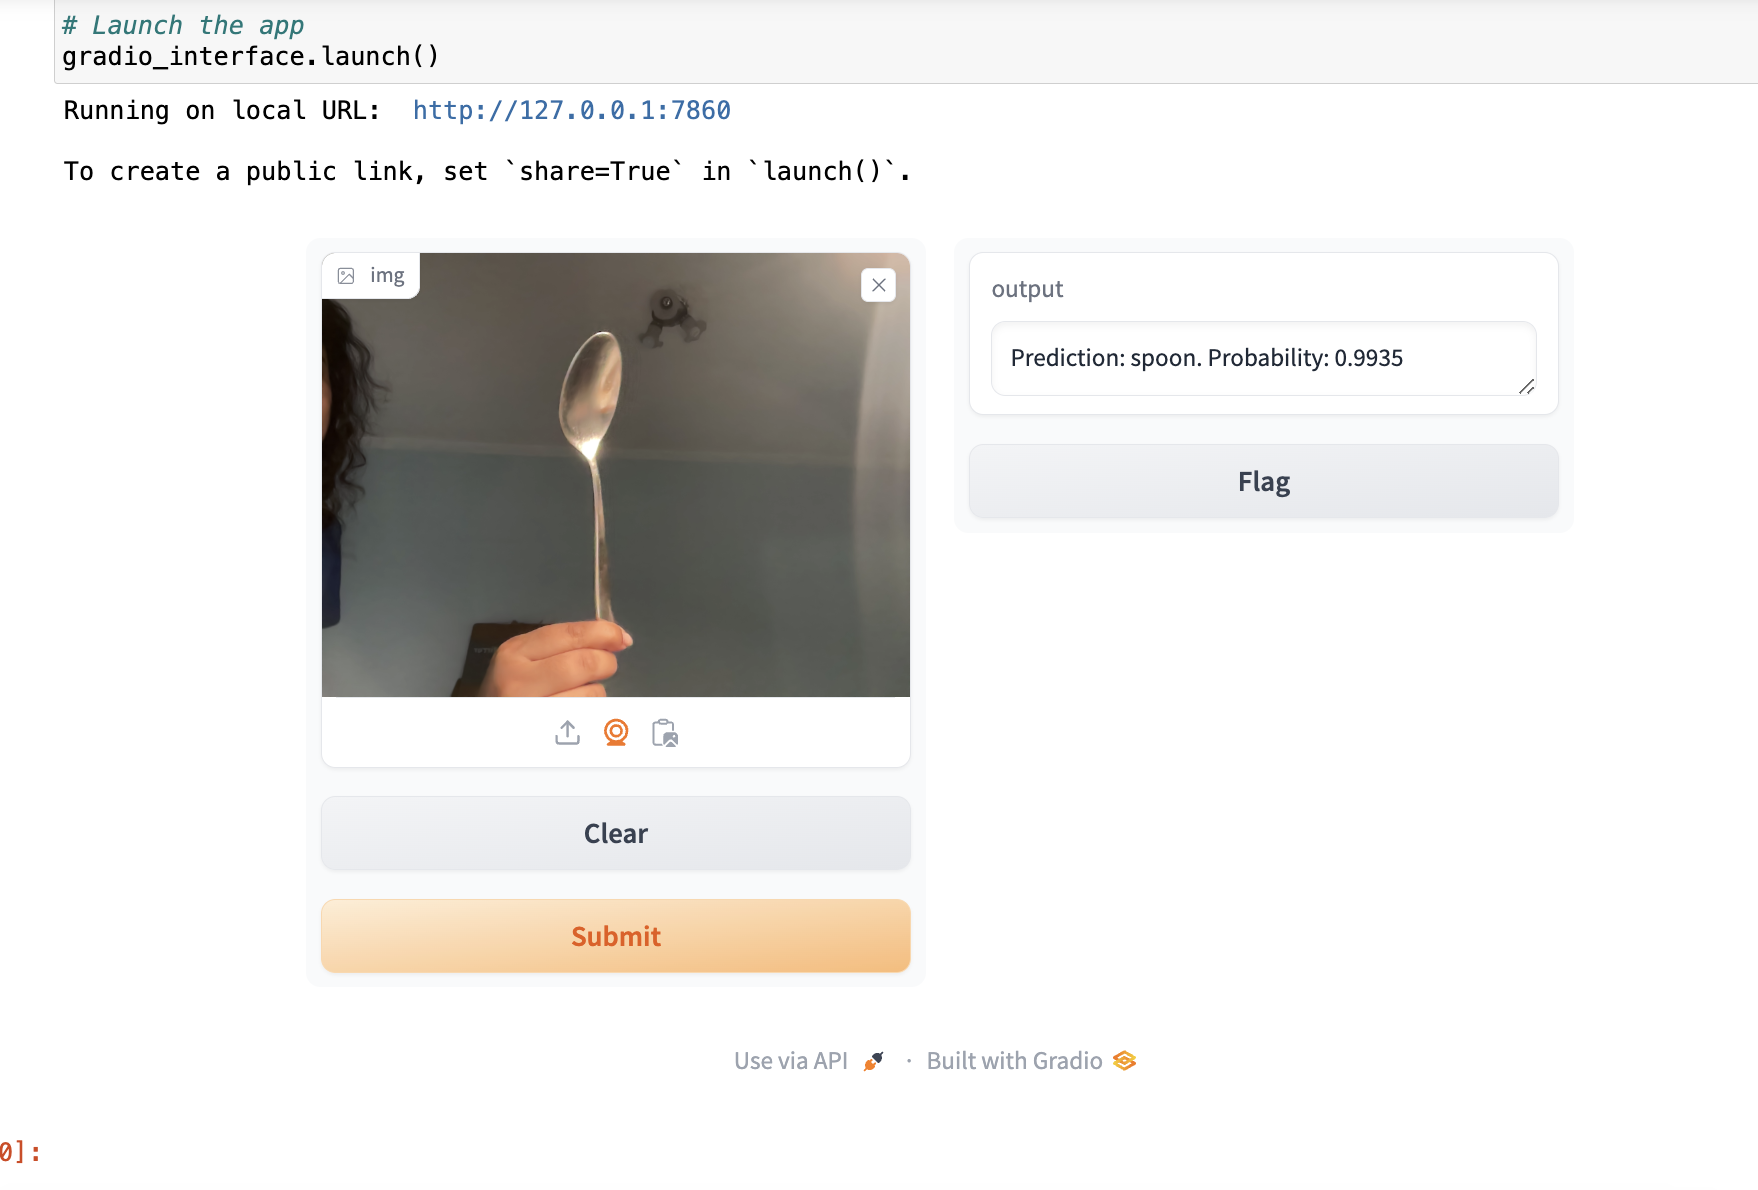

### Summary 
We have utilized Gradio to craft an intuitive web interface enabling users to upload images and swiftly obtain predictions. This interface streamlines the interaction with our image classification model, fostering a user-friendly experience. The image of fork has been predicted to be of probability of 0.9896, and the probability of fork has been 0.9935.


## Conclusion

In this project, we successfully developed a deep learning model to classify images of cutlery, focusing on forks and spoons. We utilized the fast.ai library, which allowed us to leverage transfer learning techniques to efficiently train our model with a relatively small dataset.

### Key Achievements:

1. **Data Preparation**: We curated a dataset of fork and spoon images, ensuring a balanced representation for both categories to facilitate effective model training.
2. **Model Training**: Leveraging the fast.ai library, we trained a convolutional neural network (CNN) that learned to differentiate between the two types of cutlery with high accuracy.
3. **Model Evaluation**: Through various metrics, we evaluated the model's performance, confirming that it generalizes well to new, unseen images of forks and spoons.
4. **Deployment**: We deployed our model using Gradio, creating an interactive web application where users can upload images of forks and spoons to receive instant classification results.

### Challenges and Learnings:

- One challenge was ensuring the model did not overfit given the limited size of the dataset. We addressed this by using data augmentation techniques and judiciously selecting hyperparameters.
- We learned the importance of dataset quality and balance in training a classifier, as well as the effectiveness of transfer learning when working with specialized image categories.

### Future Work:

For future improvements, we could expand the dataset to include a broader variety of cutlery items. Additionally, we could explore more complex models and fine-tuning techniques to further increase accuracy.

Overall, this project has demonstrated the power of deep learning in automating the process of image classification with practical applications in the domains of kitchen organization, retail, and recycling automation.

-------


# Kaggle

https://www.kaggle.com/code/karinathapa/fork-or-spoon-neural-network-using-fast-ai

# Video

